# Feature matching

In [13]:
# Imports
import cv2 
import numpy as np
import matplotlib.pyplot as plt

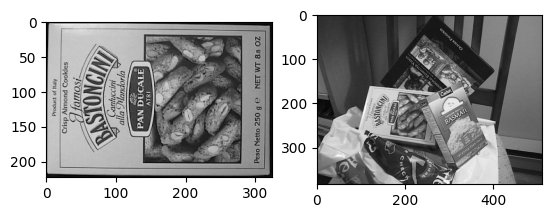

In [14]:
# Load image
image1 = cv2.imread('../../data/box.png')
image2 = cv2.imread('../../data/box_in_scene.png')

# To grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Show both images
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.show()

In [15]:
# Initiate ORB featuredetector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

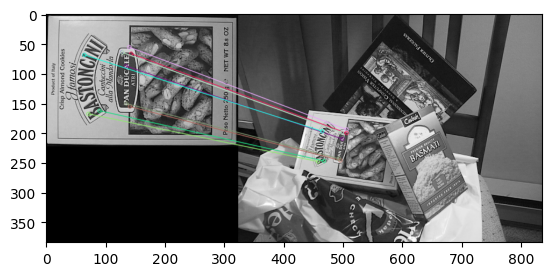

In [16]:
# Create Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors in both images
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches
result = cv2.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Show image
plt.imshow(result)
plt.show()